In [4]:
!pip install --upgrade tensorflow

In [3]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 2.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [23]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et
#indique des futurs warnings.
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle
import pandas as pd
from scipy.stats import randint
import numpy as np
import string
import time
import base64
import re
import sys
import copy
import random
from numpy import mean
from numpy import std


# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import plotly.graph_objs as go
import plotly.offline as py

from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split  # Import manquant
from keras.utils import to_categorical
from sklearn.metrics import classification_report


# TensorFlow et keras
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tqdm import tqdm
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
from os import listdir
from os.path import isfile, join
import cv2
import glob

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [8]:
import sys
my_local_drive='/content/gdrive/My Drive/Colab Notebooks'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks


'/content/gdrive/My Drive/Colab Notebooks'

In [9]:
!wget https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip

--2024-10-11 10:26:49--  https://www.lirmm.fr/~poncelet/Ressources/Tiger-Fox-Elephant.zip
Resolving www.lirmm.fr (www.lirmm.fr)... 193.49.104.251
Connecting to www.lirmm.fr (www.lirmm.fr)|193.49.104.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605545 (7.3M) [application/zip]
Saving to: ‘Tiger-Fox-Elephant.zip’

Tiger-Fox-Elephant. 100%[===================>]   7.25M  7.83MB/s    in 0.9s    

2024-10-11 10:26:51 (7.83 MB/s) - ‘Tiger-Fox-Elephant.zip’ saved [7605545/7605545]



In [10]:
import zipfile
with zipfile.ZipFile("Tiger-Fox-Elephant.zip","r") as zip_ref:
    zip_ref.extractall("Data_Project")

In [11]:
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )


COLUMNS = 25 # Nombre d'images à afficher

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

Output hidden; open in https://colab.research.google.com to view.

In [12]:
IMG_SIZE=128
mypath='Data_Project/Tiger-Fox-Elephant/tiger'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
images = np.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(mypath,onlyfiles[n]) )
  images[n]  = cv2.resize(images[n], (IMG_SIZE, IMG_SIZE))

plt.figure(figsize=(15,15))
for i in range(COLUMNS):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # cv2 lit met les images en BGR et matplotlib lit du RGB
    # il faut donc convertir pour afficher les bonnes couleurs
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel('taille ' + str(images[i].shape))

Output hidden; open in https://colab.research.google.com to view.

In [13]:
# Définition des constantes globales
IMG_SIZE = 128
BATCH_SIZE = 32
EPOCHS = 10

# Fonction pour charger et pré-traiter les données
def create_training_data(path_data, list_classes):
    training_data = []
    for classes in list_classes:
        path = os.path.join(path_data, classes)
        class_num = list_classes.index(classes)  # 0 ou 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

In [14]:
def create_X_y(path_data, list_classes):
    # Récupération des données
    training_data = create_training_data(path_data, list_classes)
    np.random.shuffle(training_data)

    X = []
    y = []
    for features, label in training_data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # Redimensionnement
    y = np.array(y)

    return X, y

In [15]:
# Fonction de normalisation
def normalize_data(X):
    X = X.astype('float32')
    X /= 255.0
    return X

In [17]:
# Fonction de création du modèle baseline (1 seule couche CNN)
def create_baseline_model():
    model = Sequential()
    # Couche Convolution avec MaxPooling
    model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten avant le fully connected
    model.add(Flatten())

    # Couche Fully Connected
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sortie binaire

    # Compilation du modèle
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [18]:
# Fonction d'affichage des courbes d'apprentissage
def plot_learning_curves(history):
    plt.figure(figsize=(14,5))

    # Courbes de loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Courbes d'accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


In [19]:
# Fonction principale pour traiter chaque dataset
def process_dataset(path_data, classes):
    # 1. Charger et normaliser les données
    X, y = create_X_y(path_data, classes)
    X = normalize_data(X)

    # Encodage des labels en catégoriel (car modèle binaire)
    y = to_categorical(y, num_classes=2)

    # 2. Diviser les données en jeu d'entraînement et de validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Créer le modèle baseline
    model = create_baseline_model()

    # 4. Entraîner le modèle
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

    # 5. Évaluer le modèle
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

    # 6. Afficher les courbes d'apprentissage
    plot_learning_curves(history)

    # 7. Classification report
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_val, axis=1)

    print(classification_report(y_true, y_pred_classes))

    return model

Modèle pour les tigres:
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 742ms/step - accuracy: 0.4969 - loss: 5.6528 - val_accuracy: 0.5250 - val_loss: 2.5929
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 686ms/step - accuracy: 0.5193 - loss: 1.6982 - val_accuracy: 0.6750 - val_loss: 0.6738
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 800ms/step - accuracy: 0.7563 - loss: 0.5689 - val_accuracy: 0.7000 - val_loss: 0.6204
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 864ms/step - accuracy: 0.8439 - loss: 0.3573 - val_accuracy: 0.7500 - val_loss: 0.4545
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 671ms/step - accuracy: 0.8697 - loss: 0.2598 - val_accuracy: 0.7750 - val_loss: 0.6224
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 634ms/step - accuracy: 0.8766 - loss: 0.2208 - val_accuracy: 0.8500 - val_loss: 0.3526
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9923 - loss: 0.0926 - val_accuracy: 0.7750 - val_loss: 0.3881
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 669ms/step - accuracy: 0.9871 - loss: 0.0683 - val_accurac

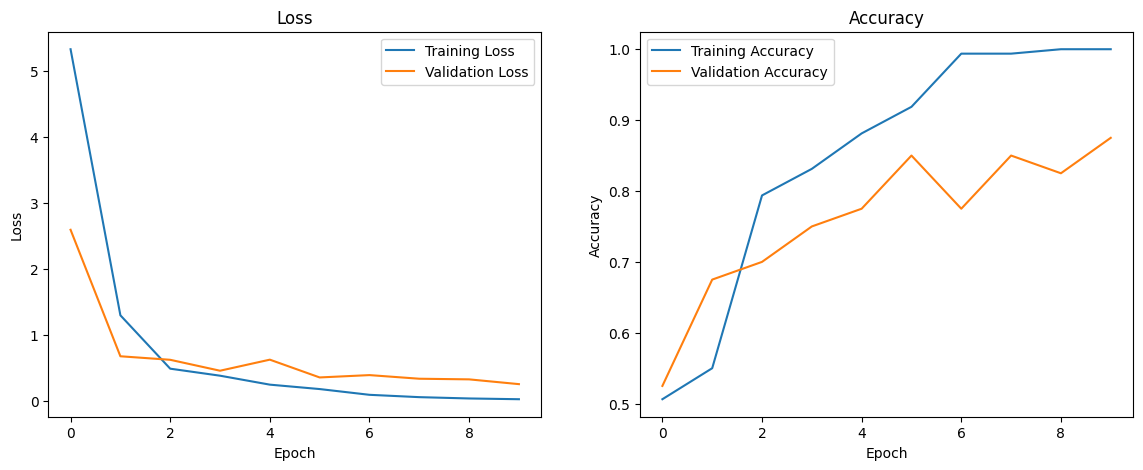

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.86      0.90      0.88        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40


Modèle pour les renards:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 753ms/step - accuracy: 0.4595 - loss: 3.8634 - val_accuracy: 0.5000 - val_loss: 2.4778
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4576 - loss: 1.9798 - val_accuracy: 0.5000 - val_loss: 1.2554
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 848ms/step - accuracy: 0.5104 - loss: 1.0329 - val_accuracy: 0.6500 - val_loss: 0.6561
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5899 - loss: 0.6464 - val_accuracy: 0.5500 - val_loss: 0.6242
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 661ms/step - accuracy: 0.7306 - loss: 0.5493 - val_accuracy: 0.8000 - val_loss: 0.5575
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9198 - loss: 0.4279 - val_accuracy: 0.8750 - val_loss: 0.4289
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 656ms/step - accuracy: 0.9076 - loss: 0.3195 - val_accuracy: 0.8750 - val_loss: 0.3660
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9799 - loss: 0.2060 - val_accuracy: 0.9500 - val_loss: 0.2834
Epoc

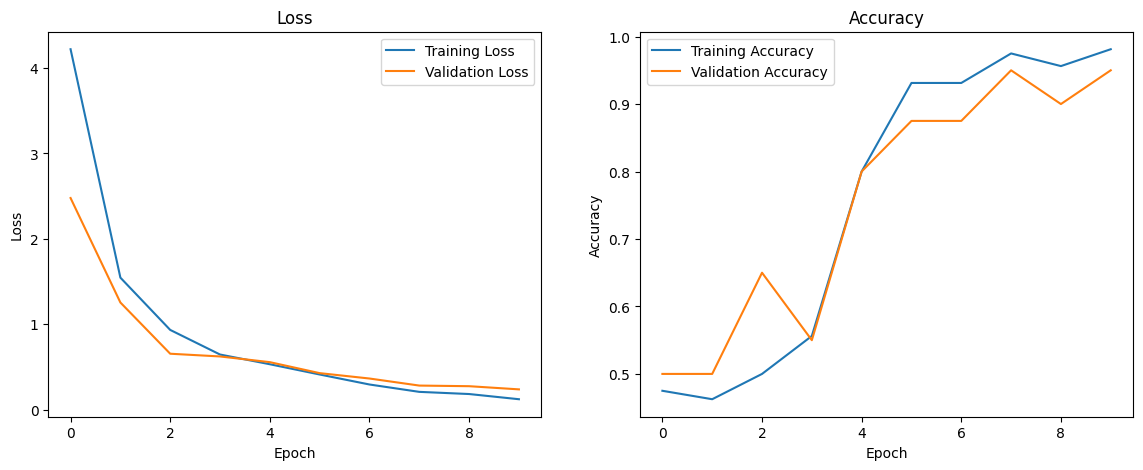

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.90      0.95        20

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40


Modèle pour les éléphants:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 739ms/step - accuracy: 0.5107 - loss: 3.5107 - val_accuracy: 0.5750 - val_loss: 1.4674
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 664ms/step - accuracy: 0.6227 - loss: 1.2078 - val_accuracy: 0.5750 - val_loss: 1.6892
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.7980 - loss: 0.7591 - val_accuracy: 0.7750 - val_loss: 0.7657
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 653ms/step - accuracy: 0.8249 - loss: 0.3874 - val_accuracy: 0.7500 - val_loss: 0.7593
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 642ms/step - accuracy: 0.8928 - loss: 0.2853 - val_accuracy: 0.8250 - val_loss: 0.3744
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 956ms/step - accuracy: 0.9381 - loss: 0.1791 - val_accuracy: 0.8000 - val_loss: 0.3152
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 793ms/step - accuracy: 0.9791 - loss: 0.0857 - val_accuracy: 0.8250 - val_loss: 0.3551
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 644ms/step - accuracy: 0.9949 - loss: 0.0603 - val_accuracy: 0.8250 - val_loss: 0.

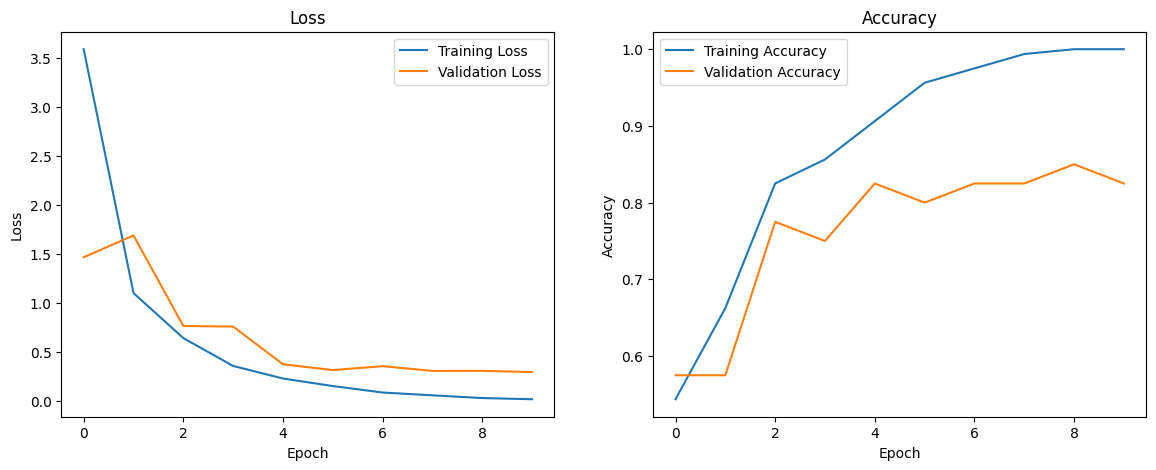

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.87      0.83      0.85        24

    accuracy                           0.82        40
   macro avg       0.82      0.82      0.82        40
weighted avg       0.83      0.82      0.83        40



In [26]:
# Fonction pour charger et pré-traiter les données
def create_training_data(path_data, list_classes):
    training_data = []
    for classes in list_classes:
        path = os.path.join(path_data, classes)
        class_num = list_classes.index(classes)  # 0 ou 1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

def create_X_y(path_data, list_classes):
    # Récupération des données
    training_data = create_training_data(path_data, list_classes)
    np.random.shuffle(training_data)

    X = []
    y = []
    for features, label in training_data:
        X.append(features)
        y.append(label)

    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)  # Redimensionnement
    y = np.array(y)

    return X, y

# Fonction de normalisation
def normalize_data(X):
    X = X.astype('float32')
    X /= 255.0
    return X

# Fonction de création du modèle baseline (1 seule couche CNN)
def create_baseline_model():
    model = Sequential()
    # Couche Convolution avec MaxPooling
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten avant le fully connected
    model.add(Flatten())

    # Couche Fully Connected
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Sortie binaire

    # Compilation du modèle
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Fonction d'affichage des courbes d'apprentissage
def plot_learning_curves(history):
    plt.figure(figsize=(14,5))

    # Courbes de loss
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Courbes d'accuracy
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Fonction principale pour traiter chaque dataset
def process_dataset(path_data, classes):
    # 1. Charger et normaliser les données
    X, y = create_X_y(path_data, classes)
    X = normalize_data(X)

    # Pas d'encodage en one-hot pour une classification binaire
    # y est déjà sous la forme (batch_size, 1)

    # 2. Diviser les données en jeu d'entraînement et de validation
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # 3. Créer le modèle baseline
    model = create_baseline_model()

    # 4. Entraîner le modèle
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=EPOCHS, batch_size=BATCH_SIZE)

    # 5. Évaluer le modèle
    val_loss, val_acc = model.evaluate(X_val, y_val)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

    # 6. Afficher les courbes d'apprentissage
    plot_learning_curves(history)

    # 7. Classification report
    y_pred = (model.predict(X_val) > 0.5).astype("int32").flatten()

    print(classification_report(y_val, y_pred))

    return model

# Traitement des datasets (Tigres, Renards, Éléphants)
path_data = "Data_Project/Tiger-Fox-Elephant/"
classes_tiger = ['tiger', 'Tiger_negative_class']
classes_fox = ['fox', 'Fox_negative_class']
classes_elephant = ['elephant', 'Elephant_negative_class']

# Traitement du jeu de données pour les tigres
print("Modèle pour les tigres:")
model_tiger = process_dataset(path_data, classes_tiger)

# Traitement du jeu de données pour les renards
print("\nModèle pour les renards:")
model_fox = process_dataset(path_data, classes_fox)

# Traitement du jeu de données pour les éléphants
print("\nModèle pour les éléphants:")
model_elephant = process_dataset(path_data, classes_elephant)